In [3]:
import pandas as pd 
import numpy as np 
import nltk
from nltk.stem import WordNetLemmatizer  
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.svm import  LinearSVC
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from string import punctuation
punct= list(punctuation)


In [4]:
df = pd.read_csv("../data/new/train.csv.zip", encoding="latin", compression="zip", usecols=["text", "sentiment"])
df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


In [5]:
df.dropna(inplace=True)


In [6]:
for i in df['sentiment']:
    if i == 'positive':
        df['sentiment'].replace(i,1,inplace=True)
    elif i == 'negative':
        df['sentiment'].replace(i,-1,inplace=True)
    elif i == 'neutral':
        df['sentiment'].replace(i,0,inplace=True)

In [7]:
df['text'].isnull().sum()
df = df.drop_duplicates('text')
df.head(15)

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1
5,http://www.dothebouncy.com/smf - some shameles...,0
6,2am feedings for the baby are fun when he is a...,1
7,Soooo high,0
8,Both of you,0
9,Journey!? Wow... u just became cooler. hehe....,1


In [8]:
import re
def invalidity_clear(text):
     text = str(text)
     text = text.lower()                                                          
     text = re.sub(r"https\S+|www\S+|https\S+|http\S+"," ",text,flags=re.MULTILINE) 
     text=re.sub("(\\d|\\W)+"," ",text)       
     text = re.sub(r'\@\w+|\#'," ",text)      
     text = re.sub(r'[^\w\s\`]'," ",text)     
     text_tokens = word_tokenize(text) 
     lem = SnowballStemmer("english")
     text = [lem.stem(word) for word in text_tokens if not word in punct] 
     text1 = " ".join(text)
     return text1 

In [9]:
df['text'] = df['text'].apply(invalidity_clear)

<Axes: xlabel='sentiment', ylabel='count'>

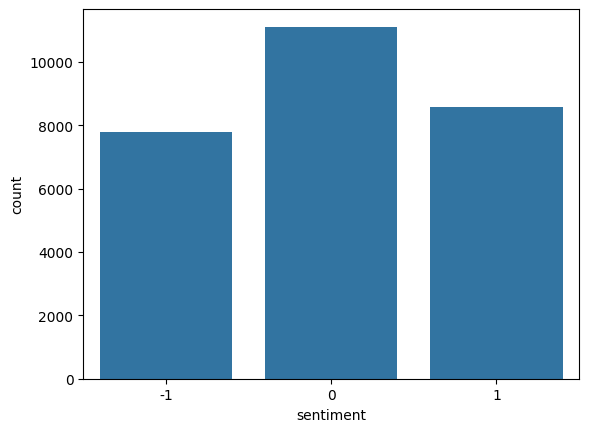

In [10]:
import seaborn as sns

sns.countplot(data=df, x='sentiment')


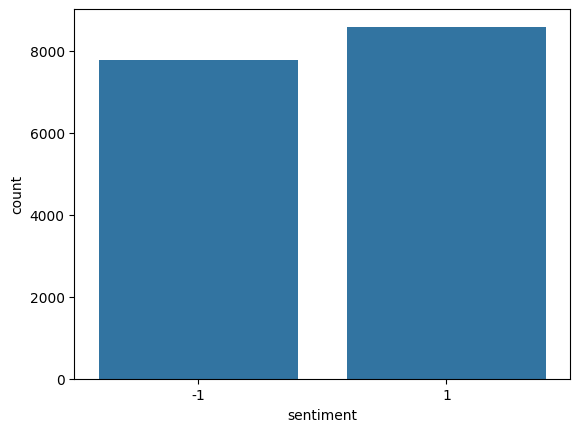

In [18]:
df1 = df[(df['sentiment'] == 1) | (df['sentiment'] == -1)]
sns.countplot(data = df1, x='sentiment')
df1 = df1.reset_index(drop=True)
x_axis_1 = df1['text']
y_axis_1 = df1['sentiment']
vectorizer1 = tf()
vector1 = vectorizer1.fit_transform(x_axis_1)

df2 = df[(df['sentiment'] == 0) | (df['sentiment'] == -1)]
df2 = df2.reset_index(drop=True)
x_axis_2 = df2['text']
y_axis_2 = df2['sentiment']
vectorizer2 = tf()
vector2 = vectorizer2.fit_transform(x_axis_2)

df3 = df[(df['sentiment'] == 1) | (df['sentiment'] == 0)]
df3 = df3.reset_index(drop=True)
x_axis_3 = df3['text']
y_axis_3 = df3['sentiment']
vectorizer3 = tf()
vector3 = vectorizer3.fit_transform(x_axis_3)

In [19]:
svm1 = LinearSVC(dual = True)
svm1.fit(vector1, y_axis_1)

svm2 = LinearSVC(dual = True)
svm2.fit(vector2, y_axis_2)

svm3 = LinearSVC(dual = True)
svm3.fit(vector3, y_axis_3)

LinearSVC(dual=True)

In [20]:
from collections import Counter

def analyse():
    sentence = input()
    one = svm1.predict(vectorizer1.transform([sentence]))[0]
    print(one)
    two = svm2.predict(vectorizer2.transform([sentence]))[0]
    print(two)
    three = svm3.predict(vectorizer3.transform([sentence]))[0]
    print(three)

    numbers = [one, two, three]
    counter = Counter(numbers)
    most_common_number = counter.most_common(1)[0][0]
    return most_common_number

In [30]:
senti = analyse()
if senti == 1:
    print("We are glad that you are happy with our services!")
elif senti == -1:
    print("We are sorry that you are unhappy with our services. Kindly tell us how we can improve.")
elif senti == 0:
    print("We are glad that you are satisfied with our services!")

1
0
1
We are glad that you are happy with our services!
